In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [26]:
df = pd.read_csv('CCTV_in_Seoul.csv', 
                 encoding='utf-8',
                 index_col='기관명')
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

In [27]:
# 1. 2014년, 15년에 대한 바차트를 그리시오
# 2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
# 총CCTV설치수 컬럼을 추가하시요
# 3.최근 2년동안 cctv 증가율을 구하시오
# 4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성

In [70]:
def fn(v):
    if v<1.0:
        return '낮음'
    elif v<1.2:
        return '보통'
    else:
        return '많음'

1:


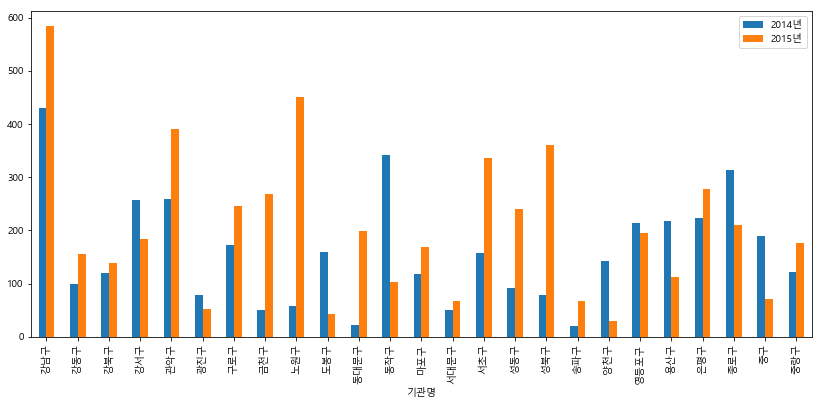

2: 기관명
강남구    66198
양천구    49676
서초구    46497
은평구    43791
용산구    40920
Name: 총 CCTV 설치 수, dtype: int64


3. 2015년 증가율: 28.66817155756206
3. 2016년 증가율: 88.05068226120858


4:         소계  2013년도 이전  2014년  2015년  2016년  총 CCTV 설치 수 설치 정도 CCTV 증가율
기관명                                                                   
강남구   2780       1292    430    584    932        66198    높음       낮음
강동구    773        379     99    155    377        19613    낮음       낮음
강북구    748        369    120    138    204        17369    낮음       낮음
강서구    884        388    258    184     81        19745    낮음       낮음
관악구   1496        846    260    390    613        39655    높음       낮음
광진구    707        573     78     53    174        17435    낮음       낮음
구로구   1561       1142    173    246    323        37895    높음       낮음
금천구   1015        674     51    269    354        25993    높음       낮음
노원구   1265        542     57    451    516        31141    높음       낮음
도봉구    485        238    159     42    386  

In [90]:
print('1:', sep=' ')
df[['2014년', '2015년']].plot(kind='bar', figsize=(14,6))
plt.show()

df['총 CCTV 설치 수'] = df.sum(axis=1)
print('2:', df['총 CCTV 설치 수'].sort_values(ascending=False)[:5], end='\n\n\n')

print('3. 2015년 증가율:', df.sum()['2015년']/df.sum()['2014년']*100-100)
print('3. 2016년 증가율:', df.sum()['2016년']/df.sum()['2015년']*100-100, end='\n\n\n')

df['설치 정도'] = df['소계'].apply(lambda v:'높음' if v>=1000 else '낮음')
print('4:', df, end='\n\n\n')

reg = df [df['2016년'] == df['2016년'].max()].index
print('5:', df.loc[reg][['2014년', '2015년']], end='\n\n\n')
df['CCTV 증가율'] = (df['2016년']/df['2013년도 이전']).apply(fn)
print('6:', df, end='\n\n\n')